In [1]:
import pandas as pd
import glob
import os
import math
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean


In [ ]:
# path = "/home/spicygremlin/Github/CS220/combined_speedup/raw/"
# results = []
# graph_files = glob.glob(os.path.join(path, "*-nodes.csv"))
# for graph in graph_files:
#     df = pd.read_csv(graph,index_col=None,header=0)
#     df = df[df['in_netlist'] == 0]
#     results.extend(df['history_cost'].values)
# # df = pd.read_csv(graph_files[0],index_col=None,header=0)
# # results = list(filter(lambda x: x > 2, results))
# plt.yscale('log')
# # plt.xticks(range(len(results)),results)
# # print(max(results))
# plt.hist(results, int(max(results)))
# # plt.set_ylim([None,10^6])


In [ ]:
# path = "/home/spicygremlin/Github/CS220/combined_storage/raw/"
# results = []
# graph_files = glob.glob(os.path.join(path, "strat*.csv"))
# for graph in graph_files:
#     df = pd.read_csv(graph,index_col=None,header=0)
#     results.extend(df['history_cost'].values)
# # df = pd.read_csv(graph_files[0],index_col=None,header=0)
# # results = list(filter(lambda x: x > 2, results))
# plt.yscale('log')
# plt.hist(results, 6, color="skyblue")

(array([3.445088e+06, 5.153000e+03, 2.519700e+04, 1.520000e+02,
        6.000000e+01, 1.053000e+03]),
 array([1.       , 2.1342686, 3.2685372, 4.4028058, 5.5370744, 6.671343 ,
        7.8056116]),
 <a list of 6 Patch objects>)

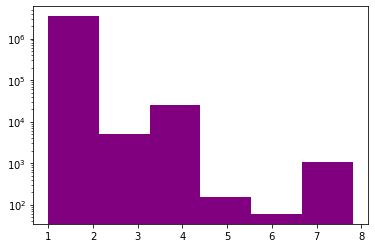

In [4]:
path = "/mnt/e/benchmarks/Outputs/stratixiv_arch_MMM_stratixiv_arch_timing"
results = []
graph_files = glob.glob(os.path.join(path, "prediction.csv"))
for graph in graph_files:
    df = pd.read_csv(graph,index_col=None,header=None)
    results.extend(df[0].values)
# df = pd.read_csv(graph_files[0],index_col=None,header=0)
# results = list(filter(lambda x: x > 2, results))
plt.yscale('log')
plt.hist(results, 6, color="purple")

(array([3.475578e+06, 9.330000e+02, 1.610000e+02, 2.400000e+01,
        2.000000e+00, 5.000000e+00]),
 array([1.        , 2.16666667, 3.33333333, 4.5       , 5.66666667,
        6.83333333, 8.        ]),
 <a list of 6 Patch objects>)

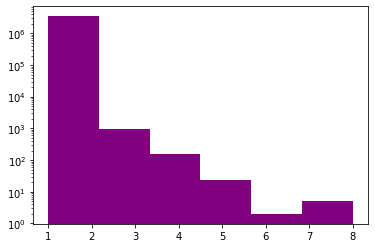

In [5]:
path = "/mnt/e/benchmarks/Outputs/stratixiv_arch_MMM_stratixiv_arch_timing"
results = []
graph_files = glob.glob(os.path.join(path, "prediction-g*.csv"))
for graph in graph_files:
    df = pd.read_csv(graph,index_col=None,header=None)
    results.extend(df[0].values)
# df = pd.read_csv(graph_files[0],index_col=None,header=0)
# results = list(filter(lambda x: x > 2, results))
plt.yscale('log')
plt.hist(results, 6, color="purple")

In [8]:
def metric(path, r_string, type_string):
    all_files = glob.glob(os.path.join(path, "*"+r_string+"*"+type_string+"*.csv"))
    for file in all_files:
        if os.path.getsize(file) == 0:
            all_files.remove(file)
        
    print(type(all_files))
    results = dict()
    results[type_string] = dict()
    results['reg'] = dict()
    results['time_gnn'] = dict()
    results['time_reg'] = dict()
    results['CPD_GNN'] = dict()
    results['CPD_REG'] = dict()
    gnn_results = dict()
    reg_results = dict()
    for gnn_metric in all_files:
        lf = gnn_metric.split("/")[-1]
        lf = lf.split(".")[0]
        name = lf.split("__"+type_string+"__")[0]
        # print(name)
    
        df = pd.read_csv(gnn_metric,index_col=None,header=0)
       
        gnn_results[name] = max(df['Iteration'])
        # print(df[].head())
    results[type_string] = gnn_results
    reg_results = dict()
    for gnn_metric in all_files:
        lf = gnn_metric.split("/")[-1]
        lf = lf.split(".")[0]
        name = lf.split("__"+type_string+"__")[0]
        # print(name)
        df = pd.read_csv(gnn_metric,index_col=None,header=0)
       
        reg_results[name] = sum(df['Time'])
    results['time_gnn'] = reg_results
    # print(results)
    reg_results = dict()

    reg_results = dict()
    for gnn_metric in all_files:
        lf = gnn_metric.split("/")[-1]
        lf = lf.split(".")[0]
        name = lf.split("__"+type_string+"__")[0]
        # print(name)
        df = pd.read_csv(gnn_metric,index_col=None,header=0)
       
        reg_results[name] = max(df['CPD (ns)'])
    results['CPD_GNN'] = reg_results
    # print(results)
    reg_results = dict()
    all_files = glob.glob(os.path.join(path, r_string+"*reg*.csv"))
    for file in all_files:
        if os.path.getsize(file) == 0:
            all_files.remove(file)
    for reg_metric in all_files:
        lf = reg_metric.split("/")[-1]
        lf = lf.split(".")[0]
        name = lf.split("__reg__")[0]
        # print(name)
        df = pd.read_csv(reg_metric,index_col=None,header=0)
       
        reg_results[name] = max(df['Iteration'])
        # print(df[].head())  
    results['reg'] = reg_results

    reg_results = dict()
    for reg_metric in all_files:
        lf = reg_metric.split("/")[-1]
        lf = lf.split(".")[0]
        name = lf.split("__reg__")[0]
        # print(name)
        df = pd.read_csv(reg_metric,index_col=None,header=0)
        reg_results[name] = sum(df['Time'])
    results['time_reg'] = reg_results

    reg_results = dict()
    for reg_metric in all_files:
        lf = reg_metric.split("/")[-1]
        lf = lf.split(".")[0]
        name = lf.split("__reg__")[0]
        # print(name)
        df = pd.read_csv(reg_metric,index_col=None,header=0)
        reg_results[name] = max(df['CPD (ns)'])
    results['CPD_REG'] = reg_results
        # print(df[].head())

    # print(results)
    my_df = pd.DataFrame.from_dict(results)
    # print(my_df)
    my_df['Reduction'] = (my_df['reg'].values - my_df[type_string].values)/my_df['reg'].values
    # my_df['Reduction']=  pd.Series(["{0:.2f}%".format(val * 100) for val in my_df['Reduction']], index = my_df.index)

    # print("{:2%}".format(my_df))
    my_df.dropna(inplace=True)
    print("Average: ", "{:.2%}".format(mean(my_df['Reduction'].values)))

    pd.set_option('expand_frame_repr', False)
    my_df['Reduction']=  pd.Series(["{0:.2f}%".format(val * 100) for val in my_df['Reduction']], index = my_df.index)
    my_df['time_reg']=  pd.Series(["{0:.2f}".format(val) for val in my_df['time_reg']], index = my_df.index)
    my_df['time_gnn']=  pd.Series(["{0:.2f}".format(val) for val in my_df['time_gnn']], index = my_df.index)
    my_df['CPD_REG']=  pd.Series(["{0:.2f}".format(val) for val in my_df['CPD_REG']], index = my_df.index)
    my_df['CPD_GNN']=  pd.Series(["{0:.2f}".format(val) for val in my_df['CPD_GNN']], index = my_df.index)
   
    print(my_df)

In [55]:
path = "/mnt/e/benchmarks/route_metrics/"
r_string = "EArch"
type_string = "gnd"
metric(path, r_string, type_string)

<class 'list'>
Average:  14.55%
                 gnd  reg time_gnn time_reg CPD_GNN CPD_REG Reduction
EArch__alu4       13   14     0.13     1.11    5.54    5.50     7.14%
EArch__apex2      13   15     0.22     1.39    6.30    6.30    13.33%
EArch__apex4      13   15     0.15     1.11    5.25    5.25    13.33%
EArch__bigkey     10   11     0.11     1.27    2.64    2.64     9.09%
EArch__clma       13   15     0.92     5.63   11.33   11.31    13.33%
EArch__des        12   13     0.18     1.87    5.20    5.20     7.69%
EArch__diffeq     10   14     0.10     0.98    6.44    6.44    28.57%
EArch__dsip        8   12     0.09     1.61    2.64    2.63    33.33%
EArch__elliptic   11   13     0.31     2.11    9.06    9.06    15.38%
EArch__ex1010     13   16     0.63     3.26    7.38    7.44    18.75%
EArch__ex5p       12   16     0.14     0.93    5.36    5.36    25.00%
EArch__frisc      11   13     0.39     1.88   11.83   11.84    15.38%
EArch__misex3     13   15     0.17     1.09    5.14    5.1

In [66]:
path = "/mnt/e/benchmarks/route_metrics/"
r_string = "strat*"
type_string = "gnn"
metric(path, r_string, type_string)

<class 'list'>
Average:  19.28%
                          gnn  reg time_gnn time_reg CPD_GNN CPD_REG Reduction
stratixiv_arch__alu4       10   11     5.78     1.53    9.29    9.30     9.09%
stratixiv_arch__apex2       9   11     6.77     2.24   10.32   10.32    18.18%
stratixiv_arch__apex4       7   10     6.05     1.71    9.29    9.27    30.00%
stratixiv_arch__bigkey      5    5    14.75     9.51    7.58    7.58     0.00%
stratixiv_arch__clma        9   12     8.86     9.32    9.54    9.55    25.00%
stratixiv_arch__des         7   11    18.00    29.11   11.44   11.42    36.36%
stratixiv_arch__diffeq      5    6     6.42     1.22    7.44    7.43    16.67%
stratixiv_arch__dsip        4    5    15.01     9.90    7.81    7.65    20.00%
stratixiv_arch__elliptic    8    7     8.97     6.19    8.51    8.50   -14.29%
stratixiv_arch__ex1010     11   11     7.08     3.96   11.08   11.08     0.00%
stratixiv_arch__ex5p        8   11     6.02     1.69    9.28    9.25    27.27%
stratixiv_arch__fris

In [68]:
path = "/mnt/e/benchmarks/route_metrics/"
r_string = "EArch"
type_string = "gnn"
metric(path, r_string, type_string)

<class 'list'>
Average:  11.00%
                 gnn  reg time_gnn time_reg CPD_GNN CPD_REG Reduction
EArch__alu4       12   14     6.20     1.11    5.54    5.50    14.29%
EArch__apex2      13   15     6.93     1.39    6.30    6.30    13.33%
EArch__apex4      13   15     5.96     1.11    5.25    5.25    13.33%
EArch__bigkey      9   11     5.63     1.27    2.64    2.64    18.18%
EArch__clma       14   15     8.38     5.63   11.34   11.31     6.67%
EArch__des        12   13     6.00     1.87    5.20    5.20     7.69%
EArch__diffeq     12   14     5.78     0.98    6.44    6.44    14.29%
EArch__dsip       10   12     5.89     1.61    2.64    2.63    16.67%
EArch__elliptic   12   13     6.82     2.11    9.07    9.06     7.69%
EArch__ex1010     14   16     6.96     3.26    7.43    7.44    12.50%
EArch__ex5p       12   16     5.64     0.93    5.36    5.36    25.00%
EArch__frisc      12   13     6.26     1.88   11.84   11.84     7.69%
EArch__misex3     13   15     5.75     1.09    5.14    5.1

In [6]:
path = "/mnt/e/benchmarks/route_metrics/"
r_string = "*stratixiv_arch_timing_"
type_string = "gnn"
metric(path, r_string, type_string)

NameError: name 'metric' is not defined

In [75]:
path = "/mnt/e/benchmarks/route_metrics/"
r_string = "*stratixiv_arch_timing*"
type_string = "gnn"
metric(path, r_string, type_string)

<class 'list'>


StatisticsError: mean requires at least one data point